In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [113]:
path = '/content/drive/Shareddrives/데이터 청년 캠퍼스/DB/data.xlsx'

In [114]:
import pandas as pd
import numpy as np

In [119]:
data = pd.read_excel(path)

In [ ]:
data.info()

In [120]:
#X = data.drop(['z_0','z_1','z_2','z_3','z_4','z_5','z_6','z_7','z_8','z_9','z_10','z_11','z_12','z_13','z_14','z_15','z_16','y','image'], axis = 1)
#X = data.drop(['x_0','y_0','z_0','x_1','y_1','z_1','x_5','y_5','z_5','x_9','y_9','z_9','x_13','y_13','z_13','y','image'], axis = 1)
X = data.drop(['y','image'], axis = 1)

In [121]:
y = data["y"]

#데이터 정규화

##손바닥 - 엄지손가락 vector을 통해 이미지 같은 방향으로 맞춘다

In [117]:
a=np.array([X['x_3'],X['y_3'],X['z_3']])
b=np.array([X['x_2'],X['y_2'],X['z_2']])

In [39]:
a

array([[ 0.75511527,  0.75979513,  0.7501415 , ...,  0.56462747,
         0.5635196 ,  0.56402957],
       [ 0.60444057,  0.6462059 ,  0.58616829, ...,  0.51695204,
         0.51092553,  0.51341414],
       [ 0.09105777,  0.15562966,  0.14300613, ..., -0.07074934,
        -0.06770804, -0.06342685]])

In [40]:
b

array([[ 0.74612272,  0.74858558,  0.73697418, ...,  0.62364095,
         0.62450492,  0.62337637],
       [ 0.65694594,  0.68164796,  0.62346029, ...,  0.52636206,
         0.52090895,  0.52263832],
       [ 0.04406672,  0.09784388,  0.08692711, ..., -0.05859124,
        -0.05629389, -0.05269257]])

In [88]:
vector23= a-b

In [89]:
vector23 #방향의 x,y,z 좌표

array([[ 0.00899255,  0.01120955,  0.01316732, ..., -0.05901349,
        -0.06098533, -0.0593468 ],
       [-0.05250537, -0.03544205, -0.037292  , ..., -0.00941002,
        -0.00998342, -0.00922418],
       [ 0.04699105,  0.05778579,  0.05607902, ..., -0.0121581 ,
        -0.01141415, -0.01073429]])

##엄지 손가락 기준으로 손크기 맞춘다

In [44]:
#X = X.iloc[num]
#y = y.iloc[num]

In [90]:
a=np.array([X['x_3'],X['y_3'],X['z_3']])
b=np.array([X['x_2'],X['y_2'],X['z_2']])

In [91]:
length = sum((a-b)**2)**(1/2)

In [92]:
length

array([0.07103407, 0.06870946, 0.06862163, ..., 0.06098327, 0.06284235,
       0.06101108])

In [93]:
length.mean()

0.10155944029787327

In [94]:
divide = length/length.mean()

In [95]:
divide

array([0.69943348, 0.67654433, 0.67567952, ..., 0.60046877, 0.61877413,
       0.60074262])

In [96]:
for i in range(len(X)):
  X.iloc[i] = X.iloc[i]/divide[i]

##특정 landmark 위치 옮긴다

#모델

In [122]:
X = X.drop(['x_0','y_0','z_0','x_1','y_1','z_1','x_5','y_5','z_5','x_9','y_9','z_9','x_13','y_13','z_13'], axis = 1)

In [29]:
#X = X.drop(['z_0','z_1','z_2','z_3','z_4','z_5','z_6','z_7','z_8','z_9','z_10','z_11','z_12','z_13','z_14','z_15','z_16'], axis = 1)
#X = X.drop(['z_2','z_3','z_4','z_6','z_7','z_8','z_10','z_11','z_12','z_14','z_15','z_16'], axis = 1)

In [101]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=104)
X_test= pd.concat([X[3374:4774],X[8073:9473]])
y_test= pd.concat([y[3374:4774],y[8073:9473]])

In [132]:
X_train = X.drop(X_test.index)
X_train.reset_index(drop=True, inplace=True)
y_train = y.drop(y_test.index)
y_train.reset_index(drop=True, inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
6626    1
6627    1
6628    1
6629    1
6630    1
Name: y, Length: 6631, dtype: int64

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

def predictions(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
      model.fit(X_train, y_train)
      #predictions
      train_pred = model.predict(X_train)
      test_pred = model.predict(X_test)
      actual = [y_train, y_test]
      pred = [train_pred, test_pred]
      for i in range(0,2):
          if i==0:
              print('----Train Metrics----')
          else:
              print('----Test Metrics----')
          metrics(actual[i], pred[i])

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
predictions(dt)
dt.feature_importances_

----Train Metrics----
Confusion Matrix:
 [[3359    0]
 [   0 3272]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3359
           1       1.00      1.00      1.00      3272

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

----Test Metrics----
Confusion Matrix:
 [[1057  358]
 [ 470  958]]


Accuracy Score:
 0.7087583538515653


Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1415
           1       0.73      0.67      0.70      1428

    accuracy                           0.71      2843
   macro avg       0.71      0.71      0.71      2843
weighted avg       0.71      0.71      0.71      2843



array([0.09987291, 0.02941067, 0.01724932, 0.04247622, 0.04247873,
       0.0111178 , 0.01738563, 0.07991586, 0.02893717, 0.01955464,
       0.01467836, 0.08055446, 0.00941828, 0.00289312, 0.00288662,
       0.01416188, 0.01297965, 0.00335722, 0.02192512, 0.01203132,
       0.01422413, 0.00932625, 0.02962987, 0.00644504, 0.01079734,
       0.04134654, 0.02003786, 0.01370978, 0.08850889, 0.04022232,
       0.00723323, 0.00509886, 0.03235832, 0.04863799, 0.02451052,
       0.04462808])

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
predictions(knn)

----Train Metrics----
Confusion Matrix:
 [[3359    0]
 [   0 3272]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3359
           1       1.00      1.00      1.00      3272

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

----Test Metrics----
Confusion Matrix:
 [[1163  252]
 [ 328 1100]]


Accuracy Score:
 0.795990151248681


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1415
           1       0.81      0.77      0.79      1428

    accuracy                           0.80      2843
   macro avg       0.80      0.80      0.80      2843
weighted avg       0.80      0.80      0.80      2843



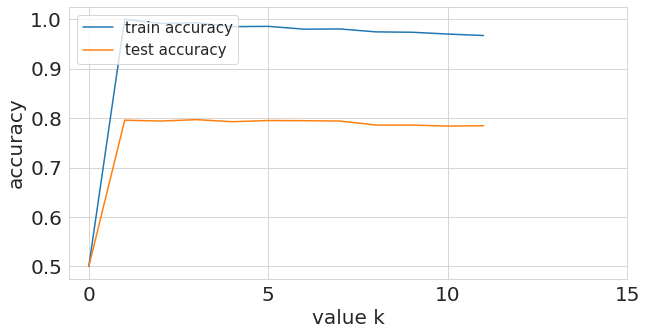

In [138]:
import matplotlib
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

for k in range(1, 12):
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Train model
    clf.fit(X_train, y_train)
    # Create train and test predictions
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    # Append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Create plots
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={"size" : 15})
plt.xticks(range(0, 16, 5))
plt.xlabel("value k", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
predictions(rf)

----Train Metrics----
Confusion Matrix:
 [[3359    0]
 [   0 3272]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3359
           1       1.00      1.00      1.00      3272

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

----Test Metrics----
Confusion Matrix:
 [[1181  234]
 [ 412 1016]]


Accuracy Score:
 0.772775237425255


Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.83      0.79      1415
           1       0.81      0.71      0.76      1428

    accuracy                           0.77      2843
   macro avg       0.78      0.77      0.77      2843
weighted avg       0.78      0.77      0.77      2843



#MLP

In [ ]:
print("shape of X: {}\nshape of y: {}".format(X.shape,y.shape))

shape of X: (9474, 51)
shape of y: (9474,)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length

trainset = dataset(X,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

ValueError: ignored

In [ ]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [ ]:
#hyper parameters
learning_rate = 0.01
epochs = 700
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [ ]:
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

In [ ]:
#plotting the loss
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')